In [34]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

from sklearn.cross_validation import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
%matplotlib inline 


In [35]:
data = pd.read_csv('/Users/suki/Desktop/valve.csv')
col_names = data.columns.tolist()

print ("Column names:")
print (col_names)

to_show = col_names[:6] + col_names[-6:]

print ("\nSample data:")
data[to_show].head(6)
      

Column names:
['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125', 'V126', 'V127', 'V128', 'V129', 'V130', 'V131', 'V132', 'V133', 'V134', 'V135', 'V136', 'V137

,V1,V2,V3,V4,V5,V6,V896,V897,V898,V899,V900,Target
0,125,128,131,134,136,139,93,89,82,84,87,0
1,246,238,233,203,249,255,133,132,132,137,191,0
2,153,160,159,159,159,160,136,135,129,125,122,0
3,245,248,250,251,251,252,162,163,164,164,166,0
4,144,126,190,224,211,191,179,177,183,185,189,0
5,66,75,76,64,69,75,112,91,104,104,119,0


We'll be keeping the statistical model pretty simple for this example so the feature space is almost unchanged from what you see above. The following code simply drops irrelevant columns and converts strings to boolean values (since models don't handle "yes" and "no" very well). The rest of the numeric columns are left untouched.

In [36]:
# Isolate target data
churn_result = data['Target']
y = np.where(churn_result == 0,0,1)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [37]:
to_drop = ['Target']
churn_feat_space = data.drop(to_drop,axis=1)
churn_feat_space

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V891,V892,V893,V894,V895,V896,V897,V898,V899,V900
0,125,128,131,134,136,139,142,144,146,146,...,102,103,100,98,95,93,89,82,84,87
1,246,238,233,203,249,255,254,255,255,255,...,134,138,134,130,133,133,132,132,137,191
2,153,160,159,159,159,160,163,165,162,157,...,147,144,140,136,138,136,135,129,125,122
3,245,248,250,251,251,252,252,252,251,251,...,139,144,149,155,159,162,163,164,164,166
4,144,126,190,224,211,191,168,142,143,152,...,189,190,191,188,188,179,177,183,185,189
5,66,75,76,64,69,75,78,79,84,87,...,106,119,151,139,129,112,91,104,104,119
6,160,33,109,101,105,102,101,101,100,98,...,117,131,141,148,154,143,120,143,146,135
7,120,152,154,153,162,160,160,156,156,153,...,29,31,29,28,24,23,13,3,5,10
8,54,25,44,47,38,63,78,74,61,56,...,87,92,83,80,83,81,80,80,78,73
9,63,67,67,61,66,70,71,73,76,73,...,97,98,100,102,102,104,104,108,109,106


In [38]:
# Pull out features for future use
features = churn_feat_space.columns
print (features)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       ...
       'V891', 'V892', 'V893', 'V894', 'V895', 'V896', 'V897', 'V898', 'V899',
       'V900'],
      dtype='object', length=900)


In [39]:
#X = churn_feat_space[churn_feat_space.columns[400:402]].as_matrix().astype(np.float)
X = churn_feat_space.as_matrix().astype(np.float)
X

array([[ 125.,  128.,  131., ...,   82.,   84.,   87.],
       [ 246.,  238.,  233., ...,  132.,  137.,  191.],
       [ 153.,  160.,  159., ...,  129.,  125.,  122.],
       ..., 
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       [  55.,   57.,   59., ...,  101.,  102.,  103.],
       [ 176.,  182.,  178., ...,  126.,  133.,  114.]])

In [40]:
# This is important
scaler = StandardScaler()
X = scaler.fit_transform(X)
print ("Feature space holds %d observations and %d features" % X.shape)
print ("Unique target labels:", np.unique(y))
X

Feature space holds 284 observations and 900 features
Unique target labels: [0 1]


array([[-0.13211436, -0.06183911, -0.0310576 , ..., -0.61810169,
        -0.58650679, -0.57177469],
       [ 1.68678702,  1.60787021,  1.49123784, ...,  0.19503931,
         0.27200728,  1.14030329],
       [ 0.28878844,  0.42389451,  0.38682742, ...,  0.14625085,
         0.07762674,  0.0044054 ],
       ..., 
       [-2.01114471, -2.00477359, -1.98616253, ..., -1.95165293,
        -1.9471706 , -2.00399377],
       [-1.18437136, -1.13956058, -1.10561909, ..., -0.30910811,
        -0.29493597, -0.30837808],
       [ 0.63453002,  0.75783638,  0.67039226, ...,  0.09746239,
         0.20721377, -0.12729291]])

In [41]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression as LR
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.metrics import average_precision_score
from sklearn.neural_network import MLPClassifier as MLP
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.linear_model import SGDClassifier as SGD
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.ensemble import BaggingClassifier as Bagging
from sklearn.ensemble import ExtraTreesClassifier as ET
from sklearn.ensemble import AdaBoostClassifier as ADA


def accuracy(y_true,y_pred):
    # NumPy interpretes True and False as 1. and 0.
    return np.mean(y_true == y_pred)
def variance(y_true,y_pred):
    return np.var(y_true == y_pred)


print ("Logistic Regression:")
print ("%.3f (+- %.3f)" % (accuracy(y, run_cv(X,y,LR)), variance(y, run_cv(X,y,LR))))
       
print ("Gradient Boosting Classifier")
print ("%.3f (+- %.3f)" % (accuracy(y, run_cv(X,y,GBC)), variance(y, run_cv(X,y,GBC))))

print ("Support Vector Machines:")
print ("%.3f (+- %.3f)" % (accuracy(y, run_cv(X,y,SVC)), variance(y, run_cv(X,y,SVC))))

print ("Random Forest:")
print ("%.3f (+- %.3f)" % (accuracy(y, run_cv(X,y,RF)), variance(y, run_cv(X,y,RF))))

print ("K Nearest Neighbors:")
print ("%.3f (+- %.3f)" % (accuracy(y, run_cv(X,y,KNN)), variance(y, run_cv(X,y,KNN))))

print ("Discriminant Analysis:")
print ("%.3f (+- %.3f)" % (accuracy(y, run_cv(X,y,LDA)), variance(y, run_cv(X,y,LDA))))

print ("MLPClassifier:")
print ("%.3f (+- %.3f)" % (accuracy(y, run_cv(X,y,MLP)), variance(y, run_cv(X,y,MLP))))

print ("Quadratic Discriminant Analysis:")
print ("%.3f (+- %.3f)" % (accuracy(y, run_cv(X,y,QDA)), variance(y, run_cv(X,y,QDA))))

print ("Stochastic Gradient Descent:")
print ("%.3f (+- %.3f)" % (accuracy(y, run_cv(X,y,SGD)), variance(y, run_cv(X,y,SGD))))

print ("Naive Bayes:")
print ("%.3f (+- %.3f)" % (accuracy(y, run_cv(X,y,NB)), variance(y, run_cv(X,y,NB))))

print ("Decision Tree:")
print ("%.3f (+- %.3f)" % (accuracy(y, run_cv(X,y,DT)), variance(y, run_cv(X,y,DT))))

print ("Bagging Classifier:")
print ("%.3f (+- %.3f)" % (accuracy(y, run_cv(X,y,Bagging)), variance(y, run_cv(X,y,Bagging))))

print ("Extra Trees Classifier:")
print ("%.3f (+- %.3f)" % (accuracy(y, run_cv(X,y,ET)), variance(y, run_cv(X,y,ET))))

print ("Adaboosting:")
print ("%.3f (+- %.3f)" % (accuracy(y, run_cv(X,y,ADA)), variance(y, run_cv(X,y,ADA))))



Logistic Regression:
0.525 (+- 0.249)
Gradient Boosting Classifier
0.599 (+- 0.247)
Support Vector Machines:
0.577 (+- 0.242)
Random Forest:
0.570 (+- 0.245)
K Nearest Neighbors:
0.556 (+- 0.248)
Discriminant Analysis:
0.511 (+- 0.249)
MLPClassifier:
0.542 (+- 0.246)
Quadratic Discriminant Analysis:
0.437 (+- 0.248)
Stochastic Gradient Descent:
0.525 (+- 0.246)
Naive Bayes:
0.637 (+- 0.236)
Decision Tree:
0.528 (+- 0.250)
Bagging Classifier:
0.563 (+- 0.248)
Extra Trees Classifier:
0.504 (+- 0.245)
Adaboosting:
0.574 (+- 0.248)


[[95 47]
 [57 85]]


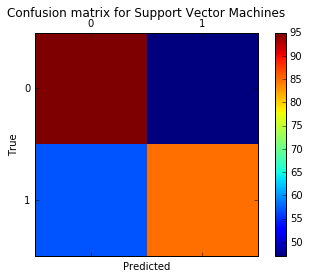

[[92 50]
 [83 59]]


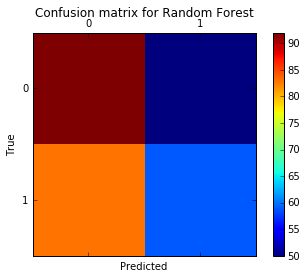

[[120  22]
 [105  37]]


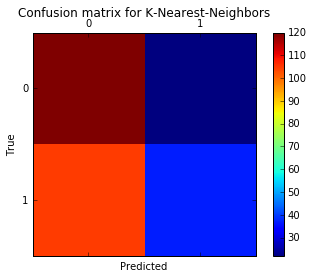

[[92 50]
 [60 82]]


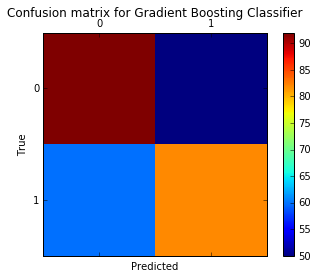

[[81 61]
 [73 69]]


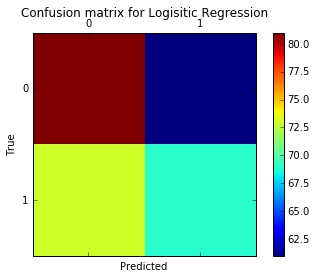

[[83 59]
 [72 70]]


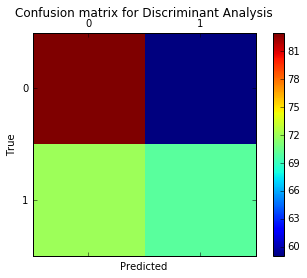

[[80 62]
 [63 79]]


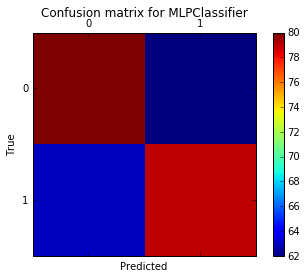

[[ 36 106]
 [ 28 114]]


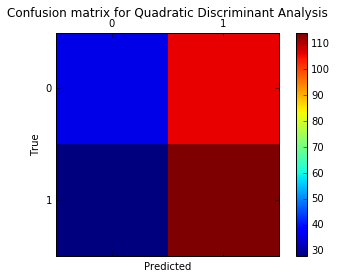

[[82 60]
 [65 77]]


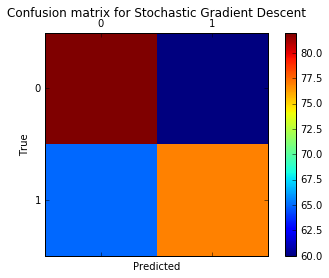

[[92 50]
 [61 81]]


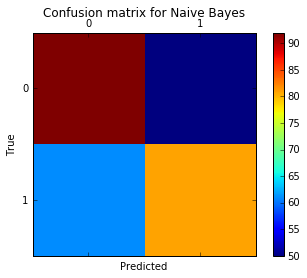

[[82 60]
 [73 69]]


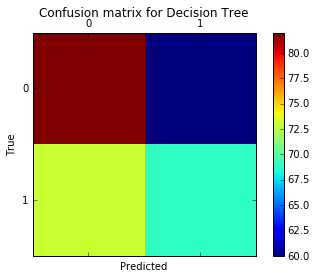

[[98 44]
 [74 68]]


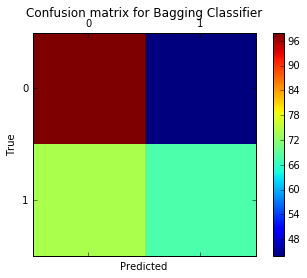

[[93 49]
 [78 64]]


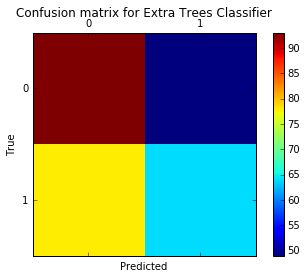

[[79 63]
 [66 76]]


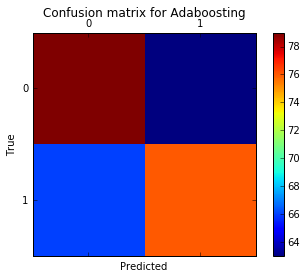

In [42]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

def draw_confusion_matrices(confusion_matricies,class_names):
    class_names = class_names.tolist()
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        print(cm)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(cm)
        plt.title('Confusion matrix for %s' % classifier)
        fig.colorbar(cax)
        ax.set_xticklabels([''] + class_names)
        ax.set_yticklabels([''] + class_names)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()
    
y = np.array(y)
class_names = np.unique(y)

confusion_matrices = [
    ( "Support Vector Machines", confusion_matrix(y,run_cv(X,y,SVC)) ),
    ( "Random Forest", confusion_matrix(y,run_cv(X,y,RF)) ),
    ( "K-Nearest-Neighbors", confusion_matrix(y,run_cv(X,y,KNN)) ),
    ( "Gradient Boosting Classifier", confusion_matrix(y,run_cv(X,y,GBC)) ),
    ( "Logisitic Regression", confusion_matrix(y,run_cv(X,y,LR)) ),
    ( "Discriminant Analysis", confusion_matrix(y,run_cv(X,y,LDA)) ),
    ( "MLPClassifier", confusion_matrix(y,run_cv(X,y,MLP)) ),
    ( "Quadratic Discriminant Analysis", confusion_matrix(y,run_cv(X,y,QDA)) ),
    ( "Stochastic Gradient Descent", confusion_matrix(y,run_cv(X,y,SGD)) ),
    ( "Naive Bayes", confusion_matrix(y,run_cv(X,y,NB)) ),
    ( "Decision Tree", confusion_matrix(y,run_cv(X,y,DT)) ),
    ( "Bagging Classifier", confusion_matrix(y,run_cv(X,y,Bagging)) ),
    ( "Extra Trees Classifier", confusion_matrix(y,run_cv(X,y,ET)) ),
    ( "Adaboosting", confusion_matrix(y,run_cv(X,y,ADA)) )
]

# Pyplot code not included to reduce clutter
# from churn_display import draw_confusion_matrices
%matplotlib inline

draw_confusion_matrices(confusion_matrices,class_names)

## ROC Plots & AUC 

Support vector machines:


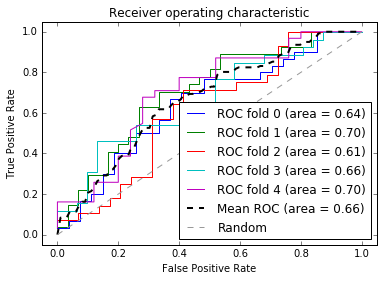

Random forests:


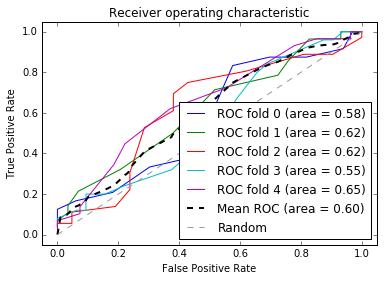

K-nearest-neighbors:


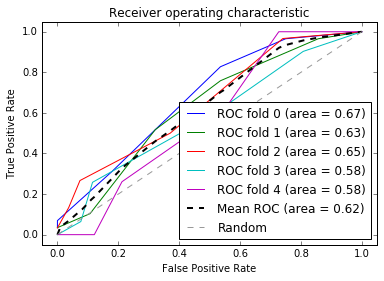

Gradient Boosting Classifier:


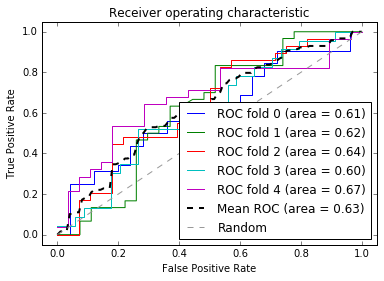

In [43]:
from sklearn.metrics import roc_curve, auc
from scipy import interp

def plot_roc(X, y, clf_class, **kwargs):
    kf = KFold(len(y), n_folds=5, shuffle=True)
    y_prob = np.zeros((len(y),2))
    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 100)
    all_tpr = []
    for i, (train_index, test_index) in enumerate(kf):
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        # Predict probabilities, not classes
        y_prob[test_index] = clf.predict_proba(X_test)
        fpr, tpr, thresholds = roc_curve(y[test_index], y_prob[test_index, 1])
        mean_tpr += interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))
    mean_tpr /= len(kf)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, 'k--',label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)
    
    plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
      

print ("Support vector machines:")
plot_roc(X,y,SVC,probability=True)

print ("Random forests:")
plot_roc(X,y,RF,n_estimators=18)

print ("K-nearest-neighbors:")
plot_roc(X,y,KNN)

print ("Gradient Boosting Classifier:")
plot_roc(X,y,GBC)

## Feature Importance

Feature ranking:
1. V1 (0.004679)
2. V2 (0.000864)
3. V3 (0.000000)
4. V4 (0.000000)
5. V5 (0.000000)
6. V6 (0.000000)
7. V7 (0.000000)
8. V8 (0.000000)
9. V9 (0.000000)
10. V10 (0.000000)


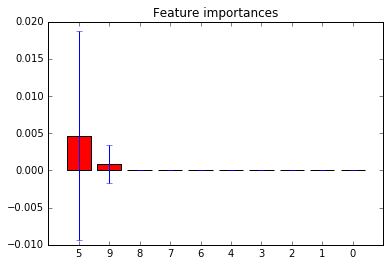

In [44]:
train_index,test_index = train_test_split(data.index)

forest = RF()
forest_fit = forest.fit(X[train_index], y[train_index])
forest_predictions = forest_fit.predict(X[test_index])

importances = forest_fit.feature_importances_[:10]
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(10):
    print("%d. %s (%f)" % (f + 1, features[f], importances[indices[f]]))

# Plot the feature importances of the forest
#import pylab as pl
plt.figure()
plt.title("Feature importances")
plt.bar(range(10), importances[indices], yerr=std[indices], color="r", align="center")
plt.xticks(range(10), indices)
plt.xlim([-1, 10])
plt.show()

## Thinking in Probabilities

Decision making often favors probability over simple classifications. There's plainly more information in statements like "there's a 20% chance of rain tomorrow" and "about 55% of test takers pass the California bar exam" than just saying "it shouldn't rain tomorrow" or "you'll probably pass." Probability predictions for churn also allow us to gauge a customers expected value, and their expected loss. Who do you want to reach out to first, the client with a 80% churn risk who pays 20,000 annually, or the client who's worth 100,000 a year with a 40% risk? How much should you spend on each client?

While I'm moving a bit away from my expertise, being able to ask that question requires producing predictions a little differently. However, `scikit-learn` makes moving to probabilities easy; my three models have `predict_proba()` built right into their class objects. This is the same cross validation code with only a few lines changed.

In [45]:
def run_prob_cv(X, y, clf_class, roc=False, **kwargs):
    kf = KFold(len(y), n_folds=5, shuffle=True)
    y_prob = np.zeros((len(y),2))
    for train_index, test_index in kf:
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        # Predict probabilities, not classes
        y_prob[test_index] = clf.predict_proba(X_test)
    return y_prob

## How good is good?

Determining how good a predictor which gives probabilities rather than classes is a bit more difficult. If I predict there's a 20% likelihood of rain tomorrow I don't get to live out all the possible outcomes of the universe. It either rains or it doesn't.

What helps is that the predictors aren't making one prediction, they're making 3000+. So for every time I predict an event to occur 20% of the time I can see how often those events actually happen. Here's we'll use `pandas` to help me compare the predictions made by random forest against the actual outcomes.

In [46]:
import warnings
warnings.filterwarnings('ignore')

# Use 10 estimators so predictions are all multiples of 0.1
pred_prob = run_prob_cv(X, y, RF, n_estimators=10)
pred_churn = pred_prob[:,1]
is_churn = y == 1

# Number of times a predicted probability is assigned to an observation
counts = pd.value_counts(pred_churn)
counts[:]

0.6    50
0.5    48
0.4    46
0.2    33
0.3    29
0.7    22
0.1    18
0.8    17
0.9    13
1.0     4
0.0     4
dtype: int64

In [47]:
from collections import defaultdict
true_prob = defaultdict(float)

# calculate true probabilities
for prob in counts.index:
    true_prob[prob] = np.mean(is_churn[pred_churn == prob])
true_prob = pd.Series(true_prob)

# pandas-fu
counts = pd.concat([counts,true_prob], axis=1).reset_index()
counts.columns = ['pred_prob', 'count', 'true_prob']
counts

,pred_prob,count,true_prob
0,0.0,4,0.000000
1,0.1,18,0.277778
2,0.2,33,0.393939
3,0.3,29,0.551724
4,0.4,46,0.391304
5,0.5,48,0.500000
6,0.6,50,0.600000
7,0.7,22,0.863636
8,0.8,17,0.588235
9,0.9,13,0.384615


We can see that random forests predicted that 75 individuals would have a 0.9 proability of churn and in actuality that group had a ~0.97 rate.

## Calibration and Descrimination

Using the `DataFrame` above we can draw a pretty simple graph to help visualize probability measurements. The x axis represents the churn probabilities which random forest assigned to a group of individuals. The y axis is the actual rate of churn within that group, and each point is scaled relative to the size of the group.

![](http://blog.yhathq.com/static/img/ggplot.png)

Calibration is a relatively simple measurement and can be summed up as so: Events predicted to happen 60% of the time should happen 60% of the time. For all individuals I predict to have a churn risk of between 30 and 40%, the true churn rate for that group should be about 35%. For the graph above think of it as, How close are my predictions to the red line?

Discrimination measures _How far are my predictions away from the green line?_ Why is that important?

Well, if we assign a churn probability of 15% to every individual we'll have near perfect calibration due to averages, but I'll be lacking any real insight. Discrimination gives a model a better score if it's able to isolate groups which are further from the base set.

Equations are replicated from [Yang, Yates, and Smith (1991)](https://www.google.com/search?q=Measures+of+Discrimination+Skill+in+Probabilistic+Judgment&oq=Measures+of+Discrimination+Skill+in+Probabilistic+Judgment) and the code Yhat wrote can be found on GitHub [here](https://github.com/EricChiang/churn/blob/master/churn_measurements.py).

In [48]:
from churn_measurements import calibration, discrimination
from sklearn.metrics import roc_curve, auc
from scipy import interp
from __future__ import division 
#from operator import idiv
 
def print_measurements(pred_prob):
    churn_prob, is_churn = pred_prob[:,1], y == 1
    print ("  %-20s %.4f" % ("Calibration Error", calibration(churn_prob, is_churn)))
    print ("  %-20s %.4f" % ("Discrimination", discrimination(churn_prob,is_churn)))

    print ("Note -- Lower calibration is better, higher discrimination is better")

In [49]:
print ("Support vector machines:")
print_measurements(run_prob_cv(X,y,SVC,probability=True))

print ("Random forests:")
print_measurements(run_prob_cv(X,y,RF,n_estimators=18))

print ("K-nearest-neighbors:")
print_measurements(run_prob_cv(X,y,KNN))

print ("Gradient Boosting Classifier:")
print_measurements(run_prob_cv(X,y,GBC))

print ("Random Forest:")
print_measurements(run_prob_cv(X,y,RF))

Support vector machines:
  Calibration Error    0.0025
  Discrimination       0.0236
Note -- Lower calibration is better, higher discrimination is better
Random forests:
  Calibration Error    0.0356
  Discrimination       0.0167
Note -- Lower calibration is better, higher discrimination is better
K-nearest-neighbors:
  Calibration Error    0.0375
  Discrimination       0.0137
Note -- Lower calibration is better, higher discrimination is better
Gradient Boosting Classifier:
  Calibration Error    0.0615
  Discrimination       0.0165
Note -- Lower calibration is better, higher discrimination is better
Random Forest:
  Calibration Error    0.0249
  Discrimination       0.0054
Note -- Lower calibration is better, higher discrimination is better
